生成分类样例数据：

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features = 2, n_informative = 2, n_redundant = 0, n_samples = 100, n_classes = 2, random_state = 0)
y[y == 0] = -1

随机森林分类实现：

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class rfc:
    """
    随机森林分类器
    """
    
    def __init__(self, n_estimators = 100, random_state = 0):
        # 随机森林的大小
        self.n_estimators = n_estimators
        # 随机森林的随机种子
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        随机森林分类器拟合
        """
        self.y_classes = np.unique(y)
        # 决策树数组
        dts = []
        n = X.shape[0]
        rs = np.random.RandomState(self.random_state)
        for i in range(self.n_estimators):
            # 创建决策树分类器
            dt = DecisionTreeClassifier(random_state=rs.randint(np.iinfo(np.int32).max), max_features = "auto")
            # 根据随机生成的权重，拟合数据集
            dt.fit(X, y, sample_weight=np.bincount(rs.randint(0, n, n), minlength = n))
            dts.append(dt)
        self.trees = dts
            
    def predict(self, X):
        """
        随机森林分类器预测
        """
        # 预测结果数组
        probas = np.zeros((X.shape[0], len(self.y_classes)))
        for i in range(self.n_estimators):
            # 决策树分类器
            dt = self.trees[i]
            # 依次预测结果可能性
            probas += dt.predict_proba(X)
        # 预测结果可能性取平均
        probas /= self.n_estimators
        # 返回预测结果
        return self.y_classes.take(np.argmax(probas, axis = 1), axis = 0)

随机森林分类拟合：

In [3]:
# 随机森林分类器
rf = rfc()
# 拟合数据集
rf.fit(X, y)

随机森林分类可视化：

<IPython.core.display.Javascript object>


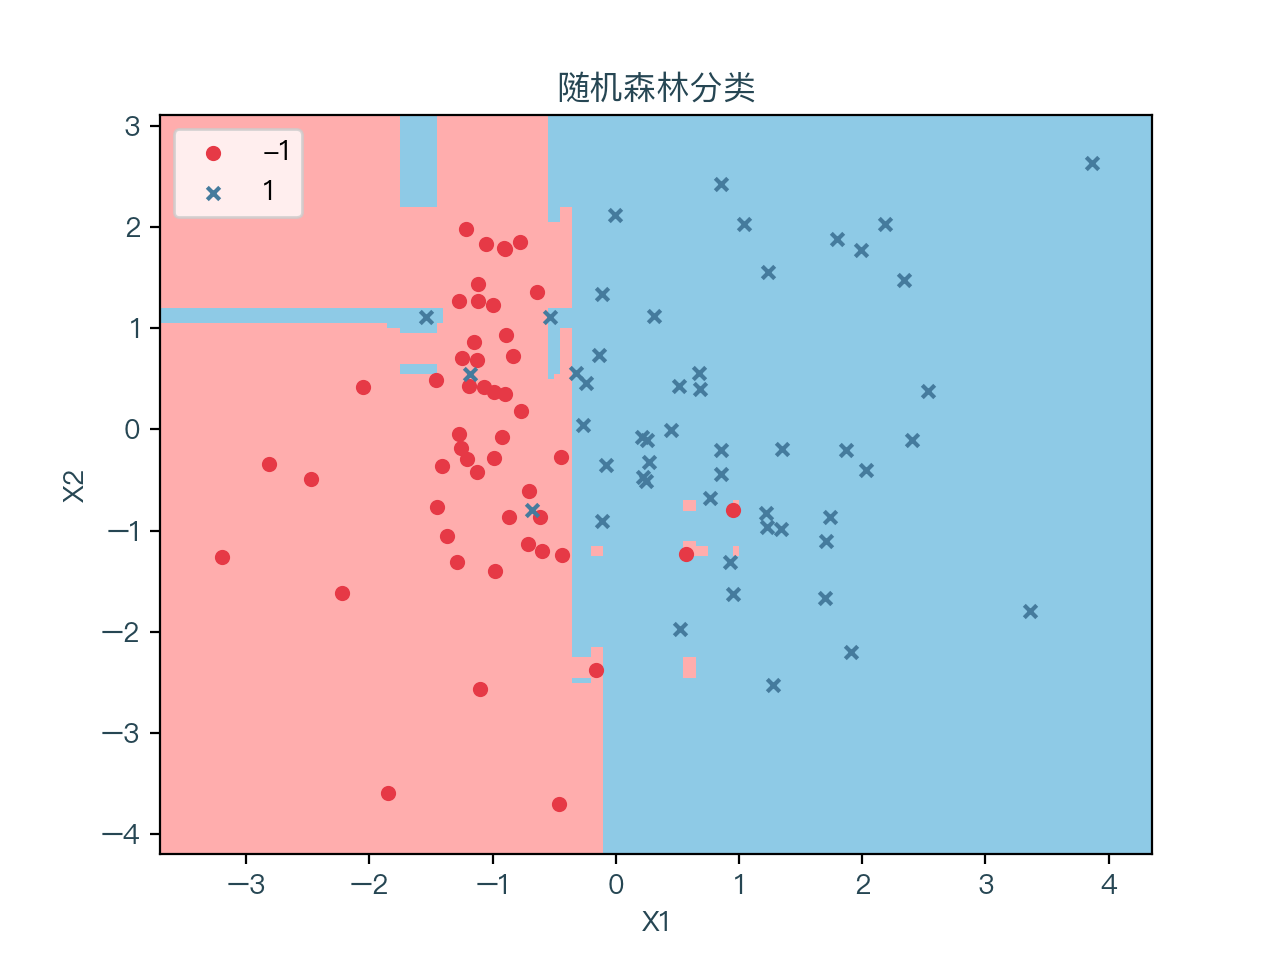

/Users/saisimon/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
clist=['#ffadad', '#8ecae6']
newcmp = LinearSegmentedColormap.from_list('point_color', clist)
plt.pcolormesh(xx, yy, Z, cmap = newcmp)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

x1 = X[y==-1][:, 0]
y1 = X[y==-1][:, 1]
x2 = X[y==1][:, 0]
y2 = X[y==1][:, 1]
p1 = plt.scatter(x1, y1, c='#e63946', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='#457b9d', marker='x', s=20)

ax.set_title('随机森林分类', color='#264653')
ax.set_xlabel('X1', color='#264653')
ax.set_ylabel('X2', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend([p1, p2], ["-1", "1"], loc="upper left")
plt.show()

随机森林分类（scikit-learn）：

In [5]:
from sklearn.ensemble import RandomForestClassifier

# 随机森林分类器
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
# 拟合数据集
clf = clf.fit(X, y)

随机森林分类可视化（scikit-learn）：

<IPython.core.display.Javascript object>


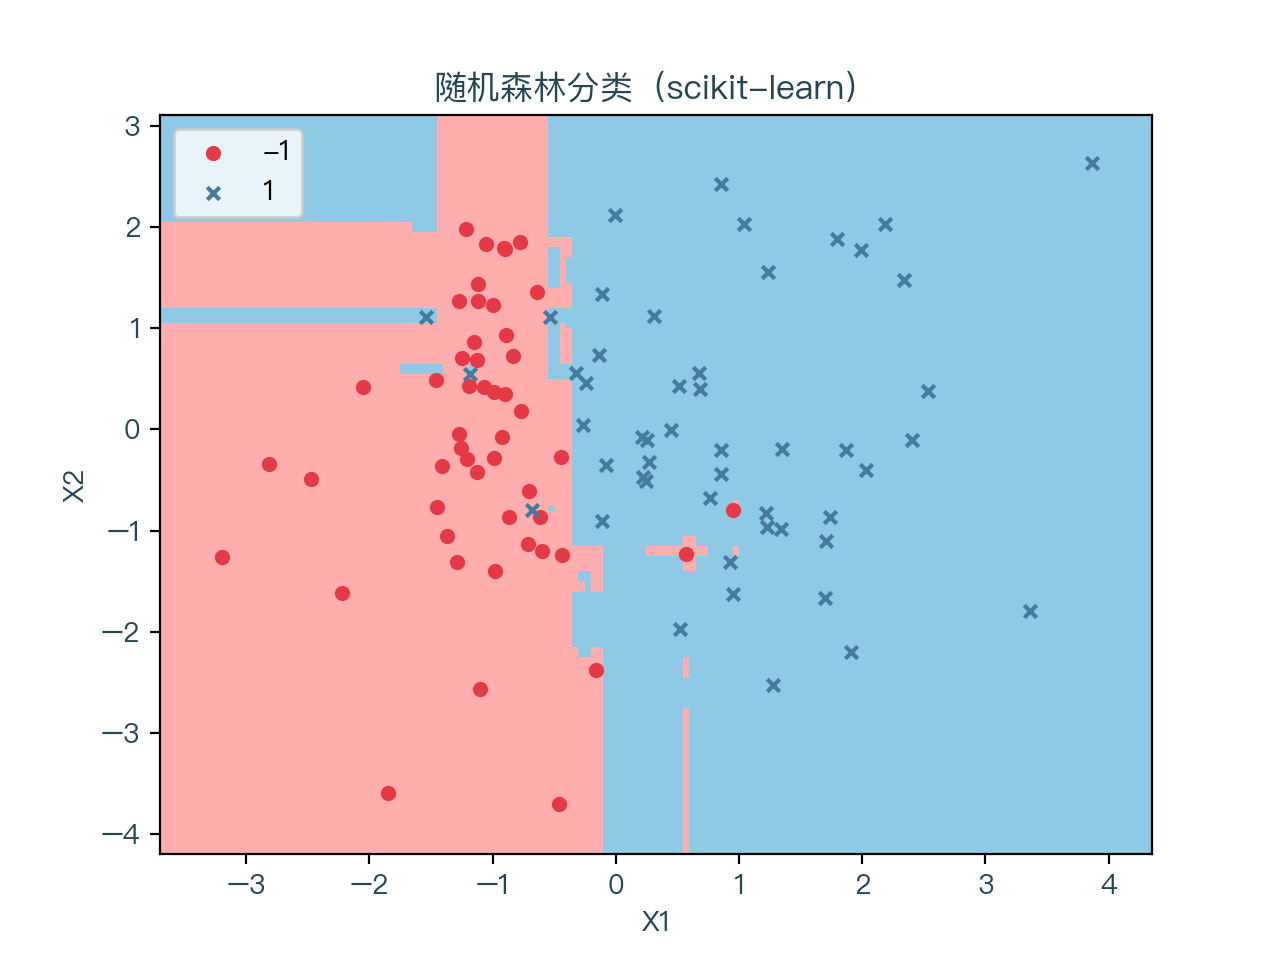

/Users/saisimon/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
clist=['#ffadad', '#8ecae6']
newcmp = LinearSegmentedColormap.from_list('point_color', clist)
plt.pcolormesh(xx, yy, Z, cmap = newcmp)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

x1 = X[y==-1][:, 0]
y1 = X[y==-1][:, 1]
x2 = X[y==1][:, 0]
y2 = X[y==1][:, 1]
p1 = plt.scatter(x1, y1, c='#e63946', marker='o', s=20)
p2 = plt.scatter(x2, y2, c='#457b9d', marker='x', s=20)

ax.set_title('随机森林分类（scikit-learn）', color='#264653')
ax.set_xlabel('X1', color='#264653')
ax.set_ylabel('X2', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.legend([p1, p2], ["-1", "1"], loc="upper left")
plt.show()

生成回归样例数据：

In [7]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features = 1, n_targets = 1, n_samples = 100, noise=5, random_state = 0)

随机森林回归实现：

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class rfr:
    """
    随机森林回归器
    """
    
    def __init__(self, n_estimators = 100, random_state = 0):
        # 随机森林的大小
        self.n_estimators = n_estimators
        # 随机森林的随机种子
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        随机森林回归器拟合
        """
        # 决策树数组
        dts = []
        n = X.shape[0]
        rs = np.random.RandomState(self.random_state)
        for i in range(self.n_estimators):
            # 创建决策树回归器
            dt = DecisionTreeRegressor(random_state=rs.randint(np.iinfo(np.int32).max), max_features = "auto")
            # 根据随机生成的权重，拟合数据集
            dt.fit(X, y, sample_weight=np.bincount(rs.randint(0, n, n), minlength = n))
            dts.append(dt)
        self.trees = dts
            
    def predict(self, X):
        """
        随机森林回归器预测
        """
        # 预测结果
        ys = np.zeros(X.shape[0])
        for i in range(self.n_estimators):
            # 决策树回归器
            dt = self.trees[i]
            # 依次预测结果
            ys += dt.predict(X)
        # 预测结果取平均
        ys /= self.n_estimators
        return ys

随机森林回归拟合：

In [9]:
# 随机森林回归器
rf = rfr()
# 拟合数据集
rf.fit(X, y)

随机森林回归可视化：

<IPython.core.display.Javascript object>


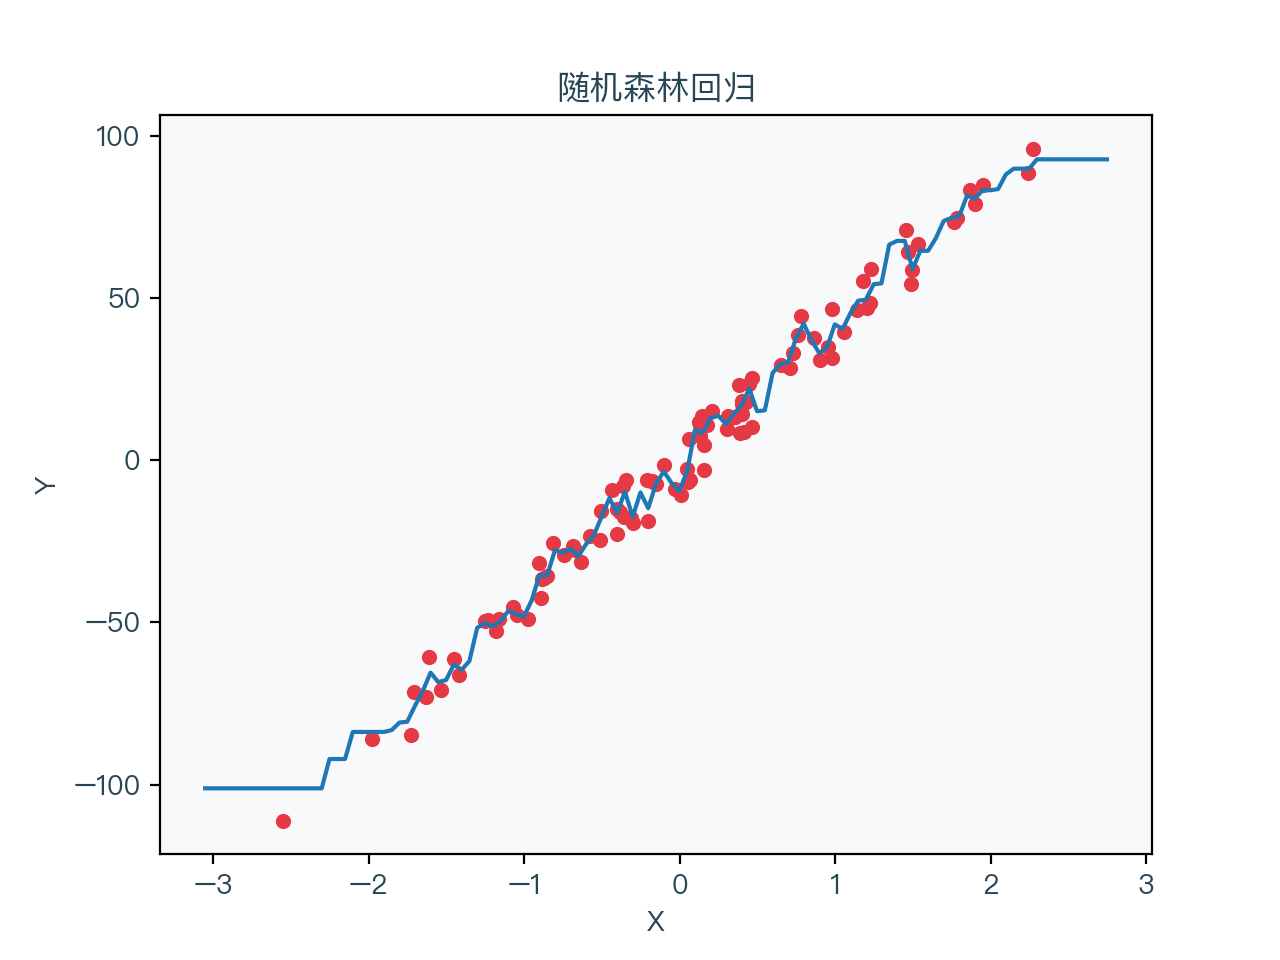

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
xx = np.arange(x_min, x_max, .05)
yy = rf.predict(np.c_[xx.ravel()])

plt.scatter(X, y, c='#e63946', marker='o', s=20)
plt.plot(xx, yy)

ax.set_title('随机森林回归', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.show()

随机森林回归（scikit-learn）：

In [11]:
from sklearn.ensemble import RandomForestRegressor

# 随机森林回归器
clf = RandomForestRegressor(n_estimators = 100, random_state = 0)
# 拟合数据集
clf = clf.fit(X, y)

随机森林回归可视化（scikit-learn）：

<IPython.core.display.Javascript object>


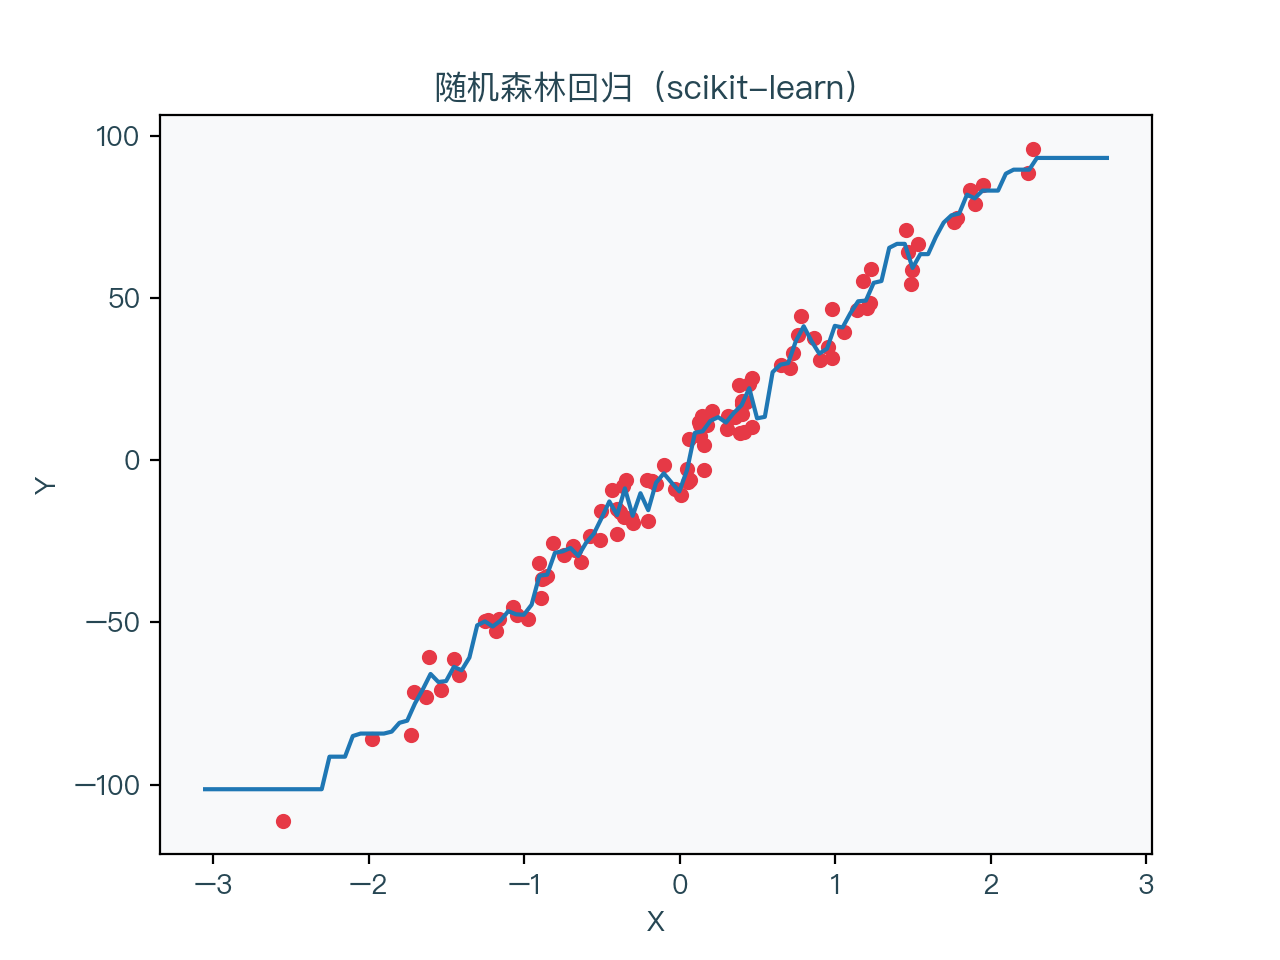

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

plt.rcParams['font.sans-serif'] = ['PingFang HK']  # 选择一个本地的支持中文的字体
fig, ax = plt.subplots()
ax.set_facecolor('#f8f9fa')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
xx = np.arange(x_min, x_max, .05)
yy = clf.predict(np.c_[xx.ravel()])

plt.scatter(X, y, c='#e63946', marker='o', s=20)
plt.plot(xx, yy)

ax.set_title('随机森林回归（scikit-learn）', color='#264653')
ax.set_xlabel('X', color='#264653')
ax.set_ylabel('Y', color='#264653')
ax.tick_params(labelcolor='#264653')
plt.show()